In [811]:
# Import Libraries
from ta import add_all_ta_features
import pandas as pd
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import random

random.seed( 10 )

In [812]:
# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/main/data/price.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
financial = pd.read_csv(io.StringIO(download.decode('utf-8')))


In [813]:
financial.iloc[:,0:20].head()

,change,changeOverTime,changePercent,close,fClose,fHigh,fLow,fOpen,fVolume,high,id,key,label,low,marketChangeOverTime,open,subkey,symbol,uClose,uHigh
0,0.00,0.000000,0.0000,123.00,123.00,124.1800,122.4900,123.66,75089134,124.1800,HISTORICAL_PRICES,AAPL,"Apr 1, 21",122.4900,0.000000,123.66,NaN,AAPL,123.00,124.1800
1,-0.85,-0.006911,-0.0069,122.15,122.15,123.5200,121.1500,121.65,118323826,123.5200,HISTORICAL_PRICES,AAPL,"Mar 31, 21",121.1500,-0.006911,121.65,NaN,AAPL,122.15,123.5200
2,-2.25,-0.025203,-0.0184,119.90,119.90,120.4031,118.8600,120.11,85671919,120.4031,HISTORICAL_PRICES,AAPL,"Mar 30, 21",118.8600,-0.025203,120.11,NaN,AAPL,119.90,120.4031
3,1.49,-0.013089,0.0124,121.39,121.39,122.5800,120.7299,121.65,80819203,122.5800,HISTORICAL_PRICES,AAPL,"Mar 29, 21",120.7299,-0.013089,121.65,NaN,AAPL,121.39,122.5800
4,-0.18,-0.014553,-0.0015,121.21,121.21,121.4800,118.9200,120.35,94071234,121.4800,HISTORICAL_PRICES,AAPL,"Mar 26, 21",118.9200,-0.014553,120.35,NaN,AAPL,121.21,121.4800


In [814]:
financial['date'] = pd.DatetimeIndex(financial['label'])

financial['date'] = financial['date'].dt.strftime('%Y-%m-%d')


In [815]:
financial.columns

Index(['change', 'changeOverTime', 'changePercent', 'close', 'fClose', 'fHigh',
       'fLow', 'fOpen', 'fVolume', 'high', 'id', 'key', 'label', 'low',
       'marketChangeOverTime', 'open', 'subkey', 'symbol', 'uClose', 'uHigh',
       'uLow', 'uOpen', 'uVolume', 'updated', 'volume', 'date'],
      dtype='object')

In [816]:
financial.shape

(12588, 26)

In [817]:
print(financial[financial['symbol'] == 'FB'].shape)

(1259, 26)


In [818]:
finance = financial[['date',
                     "open", "high", "low", "close", "volume", 'symbol']]

finance = finance[finance['symbol'] == "AAPL"]


finance['date'] = pd.DatetimeIndex(finance['date'])

finance['date'] = finance['date'].dt.strftime('%Y-%m-%d')

#finance = finance.loc[(finance['date'] >= '2020-04-01')
 #                    & (finance['date'] <= '2021-04-01')]


print(finance.shape)
finance.head()

(1258, 7)


,date,open,high,low,close,volume,symbol
0,2021-04-01,123.66,124.1800,122.4900,123.00,75089134,AAPL
1,2021-03-31,121.65,123.5200,121.1500,122.15,118323826,AAPL
2,2021-03-30,120.11,120.4031,118.8600,119.90,85671919,AAPL
3,2021-03-29,121.65,122.5800,120.7299,121.39,80819203,AAPL
4,2021-03-26,120.35,121.4800,118.9200,121.21,94071234,AAPL


In [819]:
stock_news = pd.read_csv (r'C:\Users\imaia\Desktop\Stats170A\Capstone\stock_news_data.csv')

stock_news = stock_news[stock_news['ticker'] == "AAPL"]

stock_news = stock_news.groupby('date').agg({'score' : 'mean'}).reset_index()

market_news = pd.read_csv (r'C:\Users\imaia\Desktop\Stats170A\Capstone\market_news_data.csv')

market_news = market_news.groupby('date').agg({'score' : 'mean'}).reset_index()

news_scores = stock_news.merge(market_news, on = 'date')

news_scores.columns = ["date", "stock_news_score", "market_news_score"]

print(news_scores.shape)
news_scores.head()

(218, 3)


,date,stock_news_score,market_news_score
0,2019-04-03,0.0000,-0.431067
1,2019-04-16,0.0258,0.038600
2,2019-04-29,0.0000,-0.068020
3,2019-05-01,-0.8689,0.082769
4,2019-05-06,0.0000,-0.141140


In [820]:
finance = finance.merge(news_scores, on = 'date', how = 'left')
finance = finance.fillna(0)
finance.tail()

,date,open,high,low,close,volume,symbol,stock_news_score,market_news_score
1253,2016-04-08,27.2275,27.4425,27.0425,27.1650,94326960,AAPL,0.0,0.0
1254,2016-04-07,27.4875,27.6050,27.0303,27.1350,127207480,AAPL,0.0,0.0
1255,2016-04-06,27.5575,27.7450,27.3000,27.7400,105616308,AAPL,0.0,0.0
1256,2016-04-05,27.3775,27.6825,27.3550,27.4525,106314608,AAPL,0.0,0.0
1257,2016-04-04,27.6050,28.0475,27.5675,27.7800,149424816,AAPL,0.0,0.0


In [821]:
technical = add_all_ta_features(finance, open="open", high="high", low="low", close="close",
                                     volume="volume", fillna=True)

print(technical.shape)
technical = technical.sort_values(by='date')

technical.head()

C:\Users\imaia\Anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\imaia\Anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


(1258, 92)


,date,open,high,low,close,volume,symbol,stock_news_score,market_news_score,volume_adi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
1257,2016-04-04,27.6050,28.0475,27.5675,27.7800,149424816,AAPL,0.0,0.0,8.050227e+09,...,-18.486172,2.193467,27.574831,3.724447,-11.470324,-8.683898,-2.786426,1.192970,1.185910,-77.414634
1256,2016-04-05,27.3775,27.6825,27.3550,27.4525,106314608,AAPL,0.0,0.0,8.067349e+09,...,-33.204633,2.237489,27.563124,3.623667,-13.409481,-7.987291,-5.422190,-1.036410,-1.041818,-77.680894
1255,2016-04-06,27.5575,27.7450,27.3000,27.7400,105616308,AAPL,0.0,0.0,8.110361e+09,...,-18.147208,2.313070,27.568039,4.996215,-12.509678,-6.631744,-5.877935,2.229593,2.205101,-77.447154
1254,2016-04-07,27.4875,27.6050,27.0303,27.1350,127207480,AAPL,0.0,0.0,8.007118e+09,...,-45.400943,2.479901,27.554839,3.292729,-11.245297,-5.162260,-6.083037,-0.110436,-0.110497,-77.939024
1253,2016-04-08,27.2275,27.4425,27.0425,27.1650,94326960,AAPL,0.0,0.0,8.087976e+09,...,-22.321963,2.685441,27.575643,4.130331,-11.069472,-3.641501,-7.427971,-0.330215,-0.330761,-77.914634


In [822]:
from technical_indicators_lib import OBV

obv = OBV()

technical_sub = obv.get_value_df(finance)

technical_sub = technical_sub.sort_values(by='date')

technical_sub.head()

,date,open,high,low,close,volume,symbol,stock_news_score,market_news_score,volume_adi,...,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,OBV
1257,2016-04-04,27.6050,28.0475,27.5675,27.7800,149424816,AAPL,0.0,0.0,8.050227e+09,...,2.193467,27.574831,3.724447,-11.470324,-8.683898,-2.786426,1.192970,1.185910,-77.414634,-10704425318
1256,2016-04-05,27.3775,27.6825,27.3550,27.4525,106314608,AAPL,0.0,0.0,8.067349e+09,...,2.237489,27.563124,3.623667,-13.409481,-7.987291,-5.422190,-1.036410,-1.041818,-77.680894,-10853850134
1255,2016-04-06,27.5575,27.7450,27.3000,27.7400,105616308,AAPL,0.0,0.0,8.110361e+09,...,2.313070,27.568039,4.996215,-12.509678,-6.631744,-5.877935,2.229593,2.205101,-77.447154,-10747535526
1254,2016-04-07,27.4875,27.6050,27.0303,27.1350,127207480,AAPL,0.0,0.0,8.007118e+09,...,2.479901,27.554839,3.292729,-11.245297,-5.162260,-6.083037,-0.110436,-0.110497,-77.939024,-10853151834
1253,2016-04-08,27.2275,27.4425,27.0425,27.1650,94326960,AAPL,0.0,0.0,8.087976e+09,...,2.685441,27.575643,4.130331,-11.069472,-3.641501,-7.427971,-0.330215,-0.330761,-77.914634,-10725944354


In [823]:
pip install --upgrade ta

Requirement already up-to-date: ta in c:\users\imaia\anaconda3\lib\site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.


In [824]:
technical = technical.merge(technical_sub, on = 'date', suffixes=('', '_drop'))

#Drop the duplicate columns
technical.drop([col for col in technical.columns if 'drop' in col], axis=1, inplace=True)

technical['date'] = pd.DatetimeIndex(technical['date'])

technical['day'] = technical['date'].dt.dayofweek

technical.head()

,date,open,high,low,close,volume,symbol,stock_news_score,market_news_score,volume_adi,...,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,OBV,day
0,2016-04-04,27.6050,28.0475,27.5675,27.7800,149424816,AAPL,0.0,0.0,8.050227e+09,...,27.574831,3.724447,-11.470324,-8.683898,-2.786426,1.192970,1.185910,-77.414634,-10704425318,0
1,2016-04-05,27.3775,27.6825,27.3550,27.4525,106314608,AAPL,0.0,0.0,8.067349e+09,...,27.563124,3.623667,-13.409481,-7.987291,-5.422190,-1.036410,-1.041818,-77.680894,-10853850134,1
2,2016-04-06,27.5575,27.7450,27.3000,27.7400,105616308,AAPL,0.0,0.0,8.110361e+09,...,27.568039,4.996215,-12.509678,-6.631744,-5.877935,2.229593,2.205101,-77.447154,-10747535526,2
3,2016-04-07,27.4875,27.6050,27.0303,27.1350,127207480,AAPL,0.0,0.0,8.007118e+09,...,27.554839,3.292729,-11.245297,-5.162260,-6.083037,-0.110436,-0.110497,-77.939024,-10853151834,3
4,2016-04-08,27.2275,27.4425,27.0425,27.1650,94326960,AAPL,0.0,0.0,8.087976e+09,...,27.575643,4.130331,-11.069472,-3.641501,-7.427971,-0.330215,-0.330761,-77.914634,-10725944354,4


In [825]:

drop = ['symbol', 'date']

technical = technical.drop(drop, axis = 1)

print(technical.shape)
technical.head()

(1258, 92)


,open,high,low,close,volume,stock_news_score,market_news_score,volume_adi,volume_obv,volume_cmf,...,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,OBV,day
0,27.6050,28.0475,27.5675,27.7800,149424816,0.0,0.0,8.050227e+09,-10334953254,-0.105304,...,27.574831,3.724447,-11.470324,-8.683898,-2.786426,1.192970,1.185910,-77.414634,-10704425318,0
1,27.3775,27.6825,27.3550,27.4525,106314608,0.0,0.0,8.067349e+09,-10484378070,-0.072233,...,27.563124,3.623667,-13.409481,-7.987291,-5.422190,-1.036410,-1.041818,-77.680894,-10853850134,1
2,27.5575,27.7450,27.3000,27.7400,105616308,0.0,0.0,8.110361e+09,-10378063462,-0.028438,...,27.568039,4.996215,-12.509678,-6.631744,-5.877935,2.229593,2.205101,-77.447154,-10747535526,2
3,27.4875,27.6050,27.0303,27.1350,127207480,0.0,0.0,8.007118e+09,-10483679770,-0.085882,...,27.554839,3.292729,-11.245297,-5.162260,-6.083037,-0.110436,-0.110497,-77.939024,-10853151834,3
4,27.2275,27.4425,27.0425,27.1650,94326960,0.0,0.0,8.087976e+09,-10356472290,-0.070882,...,27.575643,4.130331,-11.069472,-3.641501,-7.427971,-0.330215,-0.330761,-77.914634,-10725944354,4


In [826]:
technical = technical.dropna(axis=1)
technical.shape

(1258, 92)

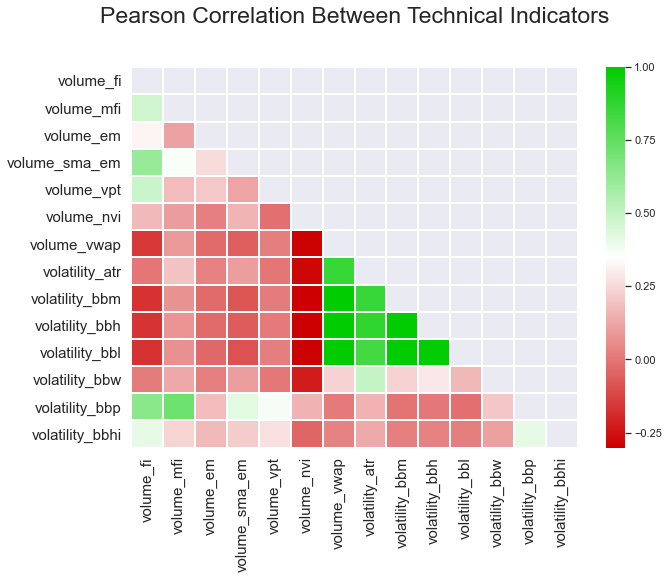

In [827]:
import matplotlib.colors as colors

sns.set()

# This dictionary defines the colormap
cdict = {'green':  ((0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'red': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }

# Create the colormap using the dictionary
GnRd = colors.LinearSegmentedColormap('GnRd', cdict)

matrix = np.triu(technical.iloc[:,10:24].corr())

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.tick_params(labelsize=15)
ax1.tick_params(labelrotation = 90, axis = 'x')

heat = sns.heatmap(technical.iloc[:,10:24].corr(), linewidths=.2, cmap=GnRd, mask = matrix)
heat.set_title('Pearson Correlation Between Technical Indicators', fontsize = 23, y =1.1)

plt.show()

In [828]:

# Find the attributes that have a correlated of greater than 0.5
correlated = technical.corr()
p_indices = np.where(correlated > 0.0)
p_indices = [(correlated.index[x], correlated.columns[y]) for x, y in zip(*p_indices)
                                        if x != y and x < y]

n_indices = np.where(correlated < -0.0)
n_indices = [(correlated.index[x], correlated.columns[y]) for x, y in zip(*n_indices)
                                        if x != y and x < y]

significant_indicators = set()

# find the attributes that are directly correlated to the opening price
for i in p_indices:
    if i[0] == 'open':
        significant_indicators.add(i[1])
    else:
        pass

for i in n_indices:
    if i[0] == 'open':
        significant_indicators.add(i[1])
    else:
        pass

significant_indicators.add("open")

print(list(significant_indicators))
print(len(list(significant_indicators)))

significant_indicators = list(significant_indicators)

['volatility_kcw', 'volatility_dcl', 'trend_sma_fast', 'momentum_tsi', 'volatility_kch', 'volatility_bbp', 'momentum_ppo', 'trend_dpo', 'stock_news_score', 'volume_em', 'trend_ema_fast', 'volatility_bbli', 'volume_vpt', 'trend_sma_slow', 'open', 'trend_kst_sig', 'volatility_bbh', 'market_news_score', 'volume_sma_em', 'volume_adi', 'volatility_atr', 'volume', 'momentum_stoch_rsi', 'trend_ichimoku_conv', 'trend_aroon_down', 'momentum_ao', 'volatility_kcc', 'volatility_kchi', 'trend_aroon_ind', 'volatility_kcl', 'trend_ichimoku_a', 'trend_macd_diff', 'volume_nvi', 'trend_psar_down_indicator', 'volatility_kcli', 'volatility_bbw', 'momentum_stoch_signal', 'trend_mass_index', 'volatility_kcp', 'trend_ichimoku_base', 'volume_cmf', 'momentum_roc', 'trend_macd_signal', 'others_dlr', 'trend_aroon_up', 'volatility_dcm', 'volatility_bbl', 'trend_adx_neg', 'momentum_stoch_rsi_k', 'trend_vortex_ind_pos', 'others_dr', 'trend_vortex_ind_neg', 'volatility_dcw', 'trend_adx_pos', 'momentum_stoch', 'trend

In [829]:
correlated = technical[significant_indicators]

In [830]:
Y = pd.DataFrame(correlated[['open']])
X = pd.DataFrame(correlated.drop(['open'], axis = 1))

In [831]:
Y.head()

,open
0,27.6050
1,27.3775
2,27.5575
3,27.4875
4,27.2275


In [832]:
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choosing between Standardization or normalization
#sc = StandardScaler()
sc = MinMaxScaler()
 
DataScaler_X = sc.fit(X)
transformed_X = DataScaler_X.transform(X)
X = pd.DataFrame(transformed_X, columns = X.columns)

DataScaler_Y = sc.fit(Y)
transformed_Y = DataScaler_Y.transform(Y)
Y = pd.DataFrame(transformed_Y, columns = Y.columns)


In [833]:
Y = Y.to_numpy()
X = X.to_numpy()

In [834]:
X.shape

(1258, 91)

In [866]:
# split into samples
X_samples_1 = list()
y_samples_1 = list()
 
NumerOfRows = X.shape[0]

TimeSteps = 4 # next day's Price Prediction is based on last how many past day's prices
FutureTimeSteps = 1 # How many days in future you want to predict the prices
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = Y[i:i+FutureTimeSteps]
    X_samples_1.append(x_sample)
    y_samples_1.append(y_sample)

# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data_1 = np.array(X_samples_1)
X_data_1 = X_data_1.reshape(X_data_1.shape[0], X_data_1.shape[1], X.shape[1])
print('\n#### Input Data shape ####')
print(X_data_1.shape)
 
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data_1 = np.array(y_samples_1)
y_data_1 = y_data_1.reshape(y_data_1.shape[0], FutureTimeSteps)
print('\n#### Output Data shape ####')
print(y_data_1.shape)


#### Input Data shape ####
(1253, 4, 91)

#### Output Data shape ####
(1253, 1)


In [897]:
from sklearn.model_selection import train_test_split

X_train_1 = X_data_1[:int(X_data_1.shape[0]*0.99)]
X_test_1 = X_data_1[int(X_data_1.shape[0]*0.99):]
y_train_1 =  y_data_1[:int( y_data_1.shape[0]*0.99)]
y_test_1 =  y_data_1[int( y_data_1.shape[0]*0.99):]

#X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_data_1, y_data_1)

In [898]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Masking, TimeDistributed
from keras.layers import LSTM
from keras import optimizers

In [899]:
# Defining Input shapes for LSTM
TimeSteps = X_train_1.shape[1]
TotalFeatures = X_train_1.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 4
Number of Features: 91


In [900]:
X_train_1.shape

(1240, 4, 91)

In [901]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [909]:
# Initialising the RNN
regressor = Sequential()

regressor.add(Dense(100))

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
#regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

regressor.add(Dense(90))

regressor.add(LSTM(units = 15, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

regressor.add(Dense(100))

regressor.add(Dense(90))

# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 10, activation = 'relu', return_sequences=False))

# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict

regressor.add(Dense(60))

regressor.add(Dense(60))

regressor.add(Dense(1))

regressor.add(Activation('linear'))

# Compiling the RNN
#optimizer = optimizers.adam(lr=0.0008)
optimizer = optimizers.Adam(lr=0.0005)
regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')

###################################################################

# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train_1, y_train_1, batch_size = 10, epochs = 124)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/124
1240/1240 [==============================] - 2s 2ms/step - loss: 0.0053
Epoch 2/124
1240/1240 [==============================] - 1s 824us/step - loss: 7.7541e-04
Epoch 3/124
1240/1240 [==============================] - 1s 585us/step - loss: 0.0019
Epoch 4/124
1240/1240 [==============================] - 1s 568us/step - loss: 2.4613e-04
Epoch 5/124
1240/1240 [==============================] - 1s 561us/step - loss: 1.9469e-04
Epoch 6/124
1240/1240 [==============================] - 1s 557us/step - loss: 1.5602e-04
Epoch 7/124
1240/1240 [==============================] - 1s 565us/step - loss: 2.7449e-04
Epoch 8/124
1240/1240 [==============================] - 1s 564us/step - loss: 3.6450e-04
Epoch 9/124
1240/1240 [==============================] - 1s 563us/step - loss: 2.1991e-04
Epoch 10/124
1240/1240 [==============================] - 1s 568us/step - loss: 1.8027e-04
Epoch 11/124
1240/1240 [==============================] - 1s 567us/step - loss: 1.4613e-04
Epoch 12/124
1240/

1240/1240 [==============================] - 1s 560us/step - loss: 5.7672e-05
Epoch 92/124
1240/1240 [==============================] - 1s 557us/step - loss: 6.4589e-05
Epoch 93/124
1240/1240 [==============================] - 1s 578us/step - loss: 1.6375e-04
Epoch 94/124
1240/1240 [==============================] - 1s 557us/step - loss: 9.9375e-05
Epoch 95/124
1240/1240 [==============================] - 1s 558us/step - loss: 1.1953e-04
Epoch 96/124
1240/1240 [==============================] - 1s 553us/step - loss: 2.0809e-04
Epoch 97/124
1240/1240 [==============================] - 1s 554us/step - loss: 5.4918e-05
Epoch 98/124
1240/1240 [==============================] - 1s 559us/step - loss: 1.1955e-04
Epoch 99/124
1240/1240 [==============================] - 1s 553us/step - loss: 1.0031e-04
Epoch 100/124
1240/1240 [==============================] - 1s 557us/step - loss: 4.9466e-05
Epoch 101/124
1240/1240 [==============================] - 1s 555us/step - loss: 1.1326e-04
Epoch 102/

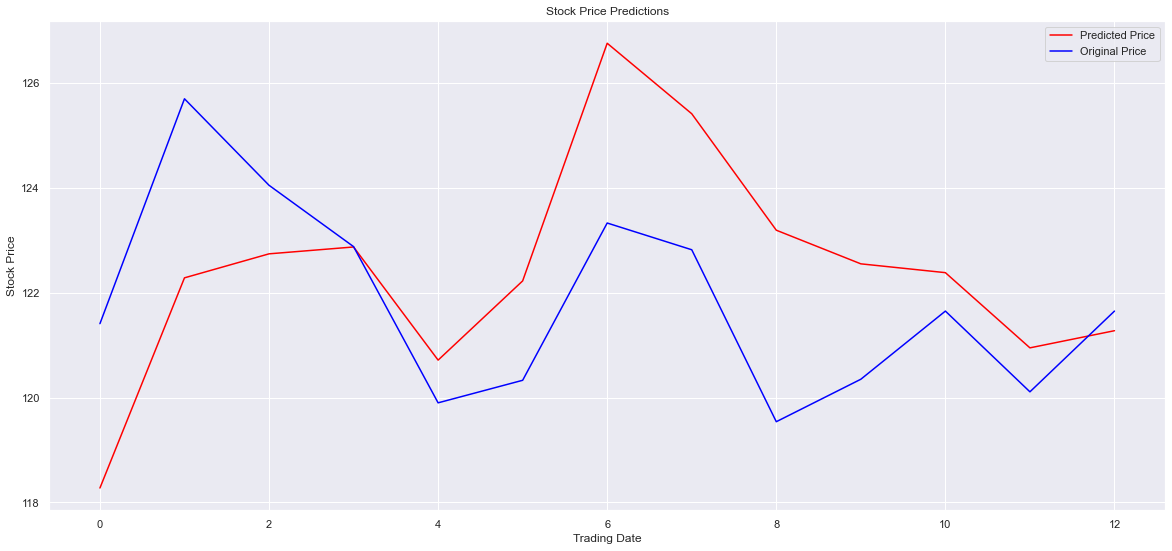

In [910]:

# Generating predictions on full data
TestPredictions=DataScaler_Y.inverse_transform(regressor.predict(X_test_1))
Y_Test = DataScaler_Y.inverse_transform(y_test_1)

# plotting the full data
plt.plot(TestPredictions, color = 'red', label = 'Predicted Price')
plt.plot(Y_Test , color = 'blue', label = 'Original Price')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(9)
plt.show()

In [908]:
y_pred = DataScaler_Y.inverse_transform(regressor.predict(X_test_1))
Y_Test = DataScaler_Y.inverse_transform(y_test_1)

percentages = [1,2,3]

total = len(Y_Test)

for percent in percentages:
    
    correct = 0
    
    for i in range(len(Y_Test)):
        upper = Y_Test[i] + (( percent / 100) * Y_Test[i] )
        lower = Y_Test[i] - (( percent / 100) * Y_Test[i] )
        if y_pred[i] < upper and y_pred[i] > lower:
            correct = correct + 1
        else:
            pass
        
    print("{}% of the predictions were {}% away from actual price".format(round((correct/total)*100,2),percent))
    

23.08% of the predictions were 1% away from actual price
61.54% of the predictions were 2% away from actual price
92.31% of the predictions were 3% away from actual price


In [844]:
total = 0

for i in range(len(Y_Test)):
    if Y_Test[i] == 0:
        pass
    else:
        away = abs((Y_Test[i] - y_pred[i]) / Y_Test[i])
    total = total + away
    
print("The predictions were on average {}% away from the actual price".format(round((total/len(y_test_1)*100)[0],2)))

The predictions were on average 1.5% away from the actual price


In [30]:
y_test_1

array([[0.60274685],
       [0.63781084],
       [0.5947352 ],
       [0.6050359 ],
       [0.6006659 ],
       [0.57392571],
       [0.57954427],
       [0.6291749 ],
       [0.68827385],
       [0.76506087],
       [0.76547706],
       [0.66122152],
       [0.65888045],
       [0.6396837 ],
       [0.61398398],
       [0.78566226],
       [0.78888773],
       [0.77777963],
       [0.82311934],
       [0.77733847],
       [0.77765061],
       [0.75434398],
       [0.73301425],
       [0.63000728],
       [0.61502445],
       [0.80064509],
       [0.91402039],
       [0.93538654],
       [0.89293518],
       [0.71844761],
       [0.72229737],
       [0.76089897],
       [0.76651753],
       [0.73873686],
       [0.76610134],
       [0.73322235],
       [0.69685777],
       [0.71282905],
       [0.69545313],
       [0.67048174],
       [0.77088752],
       [0.76308397],
       [0.74893351],
       [0.78150036],
       [0.84600978],
       [0.85527   ],
       [0.79336177],
       [0.781